# 使用数组进行面向数组编程
使用numpy数据可以使你利用简单的数组表达式完成多种数据操作任务，而无须写些大量循环，这种利用数组表达式来代替显示循环的方法，成为向量化

In [29]:
import numpy as np

In [30]:
points = np.arange(-5,5,0.01)

In [31]:
points.shape

(1000,)

## meshgrid
   从坐标向量返回坐标矩阵

In [32]:
xs,ys = np.meshgrid(points,points)

In [33]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [34]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [35]:
xs.shape

(1000, 1000)

In [36]:
ys.shape

(1000, 1000)

In [37]:
np.sqrt(1+1)

1.4142135623730951

### 对网格中的数据计算sqrt

In [38]:
z = np.sqrt(xs**2+ys**2)

In [39]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

### 数据可视化

In [40]:
import matplotlib.pyplot as plt

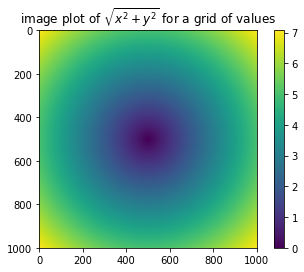

In [41]:
plt.imshow(z)
plt.title("image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.colorbar()

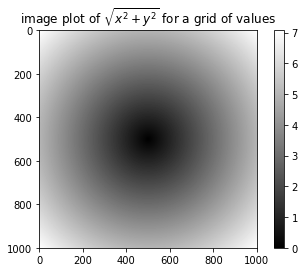

In [42]:
plt.imshow(z,cmap=plt.cm.gray)
plt.title("image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.colorbar()

## 4.3.1 讲条件逻辑作为数组操作
np.where函数是三元表达式 x if condition else y 的向量化版本

In [51]:
xarr =np.array([1.1,1.2,1.3,1.4,1.5])

In [52]:
yarr = np.array([2.1,2.2,2.3,2.4,2.5])

In [53]:
condition = np.array([True,False,True,True,True])

首先使用常用的python编程方法来操作，如：列表推导式

In [54]:
result = [(x if condition else y)
          for x,y,condition in zip(xarr,yarr,condition)]

In [55]:
result

[1.1, 2.2, 1.3, 1.4, 1.5]

上述使用方法在数据量较大或者多维数组的时候，就会遇到运行速度很慢或者无法得到想要的结果。
在面对多维数据的情况，我们使用np.where函数来操作是最好的，速度也非常快。

In [56]:
result = np.where(condition,xarr,yarr)

In [57]:
result

array([1.1, 2.2, 1.3, 1.4, 1.5])

np.where 中三个参数：
condition，为筛选的条件
xarr,yarr,就是数据了，可以是数组也可以是标量
**np.where函数在数据分析中最重要的一个典型用法是根据一个数据来生成一个新的数组**

In [59]:
arr = np.random.randn(5,5)

In [60]:
arr

array([[ 0.3607285 ,  0.16631284, -1.62368313,  0.64346856, -1.4080675 ],
       [-0.99827674,  0.10963984,  1.6359334 ,  0.0592733 , -0.82995482],
       [-0.64743748, -2.06292876,  0.39397875, -0.81467009, -0.75845867],
       [ 1.26061455, -0.51718449, -0.60380479, -1.24223643,  1.02705789],
       [-1.43390417,  0.26414719, -1.79962414,  0.40905785, -0.39873574]])

In [61]:
result = np.where(arr>0,True,False)

In [62]:
result

array([[ True,  True, False,  True, False],
       [False,  True,  True,  True, False],
       [False, False,  True, False, False],
       [ True, False, False, False,  True],
       [False,  True, False,  True, False]])

In [63]:
result1 = np.where(arr>0,100,-100)

In [64]:
result1

array([[ 100,  100, -100,  100, -100],
       [-100,  100,  100,  100, -100],
       [-100, -100,  100, -100, -100],
       [ 100, -100, -100, -100,  100],
       [-100,  100, -100,  100, -100]])

标量和数组相结合

In [69]:
result2 = np.where(arr>0,100,arr) # 大于0的改为100，小于2  的不变

In [70]:
result2

array([[100.        , 100.        ,  -1.62368313, 100.        ,
         -1.4080675 ],
       [ -0.99827674, 100.        , 100.        , 100.        ,
         -0.82995482],
       [ -0.64743748,  -2.06292876, 100.        ,  -0.81467009,
         -0.75845867],
       [100.        ,  -0.51718449,  -0.60380479,  -1.24223643,
        100.        ],
       [ -1.43390417, 100.        ,  -1.79962414, 100.        ,
         -0.39873574]])

## 4.3.2 数学和统计方法

很多关于计算整个数据统计值或者轴向数据的数学函数，可以作为数组类型的方法被调用。----此话需要多多理解一下---
比如聚合函数（也叫缩减函数），如：sum.mean，和std(标准差)

In [72]:
arr = np.random.randn(5,4)

In [73]:
arr

array([[-0.73190671, -0.26923611,  2.07317918,  0.3146115 ],
       [-0.81816083, -0.74180672, -1.09039987, -1.89454351],
       [ 0.06770435,  0.95971976, -1.1691052 , -0.93857418],
       [-1.49565864, -0.74738618,  0.49047838, -0.59933727],
       [ 0.38681234,  0.50400449,  0.30146346, -0.8509629 ]])

In [74]:
arr.mean()

-0.3124552320348707

In [75]:
arr.sum()

-6.249104640697414

In [77]:
np.mean(arr)

-0.3124552320348707

In [78]:
np.sum(arr)

-6.249104640697414

mean和sum等函数都可以只选择一个参数axis(行或者列),参数可以用于计算给定轴上的统计值，形成一个下降一维度的数组。

In [79]:
arr.mean(axis=1)

array([ 0.34666196, -1.13622773, -0.27006382, -0.58797593,  0.08532935])

In [80]:
arr.mean(axis=0)

array([-0.5182419 , -0.05894095,  0.12112319, -0.79376127])

In [81]:
arr.sum(axis=0)

array([-2.59120948, -0.29470475,  0.60561595, -3.96880635])

cumsum（累和）和cumprod（累乘）并不会聚合，它们会产生一个中间结果。

In [84]:
arr = np.array([0,1,2,3,4,5,6,7])

In [85]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [86]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])

In [87]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [88]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36], dtype=int32)

In [89]:
arr.cumsum(axis= 1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

In [90]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [91]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

**上述cumprod（累乘）是从第一个元素开始，不是从第0各元素。切记，元素索引从0开始**

## 4.3.3 布尔值数组的方法
布尔值即：0或者1，在进行数组编程时，也可以进行求和计算，同时也能进行统计和判断

In [93]:
arr = np.random.randn(100)

In [94]:
arr

array([-1.15744043,  0.12729526, -0.45236748,  0.89709491, -0.16542452,
       -0.55780274, -1.41099392,  0.33714279, -1.02600138, -2.3499316 ,
       -0.17283317,  1.75143518,  0.24797294,  0.19428528,  0.60912234,
        0.17745955, -0.01930784,  0.4689005 , -1.26682185, -0.31093601,
       -0.7090709 , -0.80415326, -1.27170631, -2.12046788,  0.60763499,
        2.1929792 ,  0.83281876,  0.19145494, -0.01019634,  1.85202041,
       -1.47908977,  2.08450898, -1.27441886, -0.15491203,  0.61929621,
       -0.56605724,  0.22563336, -1.01543627,  0.10904438,  0.5372905 ,
       -1.35036374,  0.35243125, -0.5411818 ,  1.18694205, -1.46768104,
        2.01171831, -2.38216751,  2.53847012,  1.50705571,  0.36538373,
        0.01812504, -0.70527383, -1.19763901, -0.87608036,  1.44498208,
        0.55416526, -1.18282135, -0.44969697, -1.42970051, -1.39208848,
       -1.48811862, -1.524716  , -0.14840866, -0.27803625,  0.29310416,
       -1.66393743,  0.67436879, -0.02006025,  0.4008224 , -0.18

In [95]:
(arr>0).sum()

52

In [96]:
arr = np.random.randn(4,3)

In [97]:
arr

array([[ 1.50619708,  0.03396005, -0.21658153],
       [ 0.34174065,  1.26590749,  1.13104024],
       [ 0.7452922 , -1.00323967, -0.52788029],
       [-1.12803019, -0.30121489, -1.48173477]])

In [98]:
(arr>0).sum()

6

可见数据的维度在进行判断和统计的时候，并不是问题。

In [99]:
bools = np.array([False,False,True,False])

In [100]:
bools.any()

True

In [101]:
bools.all()

False

**对于布尔值数组，有两个常用的方法**

1、any：检查数组中是否至少包含一个True。有就返回True

2、all：检查数组中是否每个值都是True.

## 4.3.4 排序
数组的排序可以使用sort()来操作，和python的内建列表类型相似。

对数组操作时，可以选择性的行列操作。

In [103]:
arr = np.random.randn(4)

In [104]:
arr

array([-1.78887309, -0.76628975, -1.54873339,  3.14654639])

In [112]:
arr.sort()

In [113]:
arr

array([-1.78887309, -1.54873339, -0.76628975,  3.14654639])

In [114]:
arr = np.random.randn(4,3)

In [115]:
arr

array([[ 0.77030572, -0.2422805 , -0.55728612],
       [-0.65986346,  0.24711846, -0.64603556],
       [-0.04194933,  0.93033485, -0.48698661],
       [ 0.46247727, -0.27885683, -1.6694833 ]])

In [116]:
arr.sort(1)

In [117]:
arr

array([[-0.55728612, -0.2422805 ,  0.77030572],
       [-0.65986346, -0.64603556,  0.24711846],
       [-0.48698661, -0.04194933,  0.93033485],
       [-1.6694833 , -0.27885683,  0.46247727]])

.sort()方法是直接在原来的数据上修改，顶层的np.sort()是返回一个已经排序好的数组拷贝。

In [124]:
arr1= np.random.randn(4,3)
a = np.sort(arr1)

In [125]:
a

array([[ 0.03207306,  0.08766541,  1.89325118],
       [-1.70421107, -1.61679575,  0.64149319],
       [-0.78046725, -0.27763788,  0.81342793],
       [-0.99663716,  0.34761645,  1.23814852]])

In [126]:
arr1

array([[ 0.08766541,  1.89325118,  0.03207306],
       [-1.61679575, -1.70421107,  0.64149319],
       [ 0.81342793, -0.27763788, -0.78046725],
       [ 0.34761645,  1.23814852, -0.99663716]])

## 4.3.5 唯一值与其他集合逻辑
Numpy包含一些针对一维ndarray的基础集合操作。
* unique(x) 计算x的唯一值，并排序
* intersect1d(x,y)  计算x和y的交集，并排序
* union1d(x,y)    计算x中的元素是否包含在y中，返回一个布尔值数组
* in1d(x,y)       计算x中的元素是否包含在y中，返回一个布尔值数组
* setdiff1d(x,y)  差集，在x中但不在y中的x的元素
* setxor1d(x,y)   异或集，在x中或y中，但不属于x,y交集的元素

In [127]:
names = np.array(['bob','joli','bob','lili','joli','bob'])

In [128]:
np.unique(names)

array(['bob', 'joli', 'lili'], dtype='<U4')

In [129]:
names

array(['bob', 'joli', 'bob', 'lili', 'joli', 'bob'], dtype='<U4')

In [130]:
arr = np.array([1,2,3,1,1,1,2,2,3,3,4,4,5,5,6])

In [131]:
np.unique(arr)

array([1, 2, 3, 4, 5, 6])

In [132]:
arr1 = np.array([1,3,5,7,9])
arr2 = np.array([2,4,6,8,0])

In [134]:
np.union1d(arr1,arr2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [135]:
values = np.array([6,0,0,3,2,5,6])

In [136]:
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])